In [133]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Read the dataset
df = pd.read_csv("C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets\\premier-league-matches92-23.csv")

# Print the original dataset
print("Original Dataset:")
print(df)
print()



Original Dataset:
       Season_End_Year  Wk        Date            Home  HomeGoals  AwayGoals  \
0                 1993   1  1992-08-15   Coventry City          2          1   
1                 1993   1  1992-08-15    Leeds United          2          1   
2                 1993   1  1992-08-15   Sheffield Utd          2          1   
3                 1993   1  1992-08-15  Crystal Palace          3          3   
4                 1993   1  1992-08-15         Arsenal          2          4   
...                ...  ..         ...             ...        ...        ...   
12021             2023  38  2023-05-28         Everton          1          0   
12022             2023  38  2023-05-28  Leicester City          2          1   
12023             2023  38  2023-05-28     Aston Villa          2          1   
12024             2023  38  2023-05-28    Leeds United          1          4   
12025             2023  38  2023-05-28       Brentford          1          0   

                  Awa

In [118]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB
None


In [164]:
#checking for null values

data = pd.read_csv("C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets\\premier-league-matches92-23.csv")

null_values = data.isnull().sum()

print("Null values in the CSV file:")
print(null_values)

if null_values.any():
    print("The CSV file contains null values.")
else:
    print("The CSV file does not contain any null values.")


Null values in the CSV file:
Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64
The CSV file does not contain any null values.


In [166]:
#checking for duplicate values


data = pd.read_csv("C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets\\premier-league-matches92-23.csv")

duplicated_rows = df.duplicated()

print("Number of duplicated rows in the CSV file:", duplicated_rows.sum())

if duplicated_rows.any():
    print("The CSV file contains duplicated rows.")
    duplicated_data = df[duplicated_rows]
    print("Duplicated rows:")
    print(duplicated_data)
else:
    print("The CSV file does not contain any duplicated rows.")


Number of duplicated rows in the CSV file: 0
The CSV file does not contain any duplicated rows.


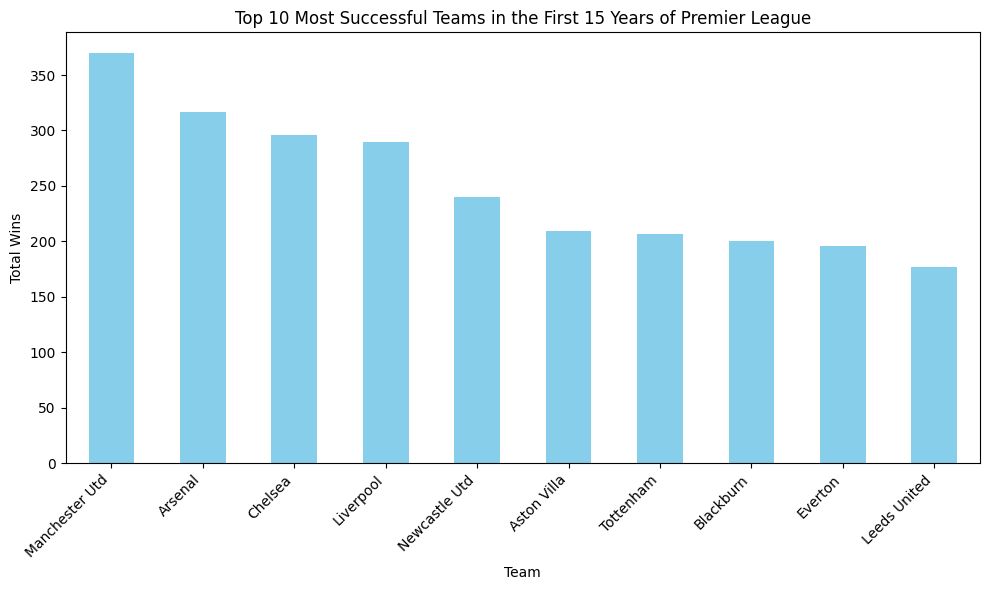

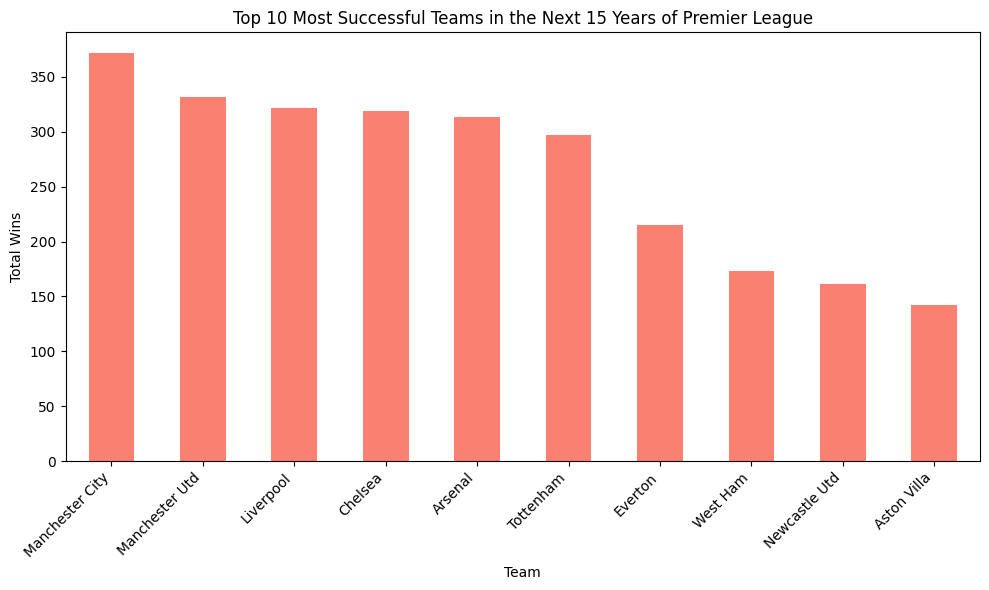

In [145]:
# Visualisation
data = pd.read_csv("C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets\\premier-league-matches92-23.csv")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the first 15 years (1993-1994 season to 2007-2008 season)
first_15_years_data = data[data['Season_End_Year'].between(1994, 2008)]

# Group data by 'Home' team and count the number of wins as home team
first_15_years_home_wins = first_15_years_data[first_15_years_data['FTR'] == 'H']['Home'].value_counts()

# Group data by 'Away' team and count the number of wins as away team
first_15_years_away_wins = first_15_years_data[first_15_years_data['FTR'] == 'A']['Away'].value_counts()

# Combine the counts of home and away wins for each team
first_15_years_total_wins = first_15_years_home_wins.add(first_15_years_away_wins, fill_value=0)

# Sort teams by total wins in descending order
first_15_years_total_wins_sorted = first_15_years_total_wins.sort_values(ascending=False)

# Plot bar chart for the first 15 years
plt.figure(figsize=(10,6))
first_15_years_total_wins_sorted[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Successful Teams in the First 15 Years of Premier League')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter data for the next 15 years (2008-2009 season to 2022-2023 season)
next_15_years_data = data[data['Season_End_Year'].between(2009, 2023)]

# Group data by 'Home' team and count the number of wins as home team
next_15_years_home_wins = next_15_years_data[next_15_years_data['FTR'] == 'H']['Home'].value_counts()

# Group data by 'Away' team and count the number of wins as away team
next_15_years_away_wins = next_15_years_data[next_15_years_data['FTR'] == 'A']['Away'].value_counts()

# Combine the counts of home and away wins for each team
next_15_years_total_wins = next_15_years_home_wins.add(next_15_years_away_wins, fill_value=0)

#teams by total wins in descending order
next_15_years_total_wins_sorted = next_15_years_total_wins.sort_values(ascending=False)

#bar chart for the next 15 years
plt.figure(figsize=(10,6))
next_15_years_total_wins_sorted[:10].plot(kind='bar', color='salmon')
plt.title('Top 10 Most Successful Teams in the Next 15 Years of Premier League')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [119]:
# Define a function to calculate points
def calculate_points(result):
    if result == 'H':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

# Create a function to generate league tables for each season
def generate_league_table(df, save_path):
    # Initialize an empty dictionary to store league tables for each season
    league_tables = {}

    # Group the dataframe by season
    grouped_by_season = df.groupby("Season_End_Year")

    # Iterate over each season
    for season, data in grouped_by_season:
        # Initialize an empty dictionary to store team statistics
        team_stats = {}

        # Iterate over each row in the season's data
        for index, row in data.iterrows():
            home_team = row["Home"]
            away_team = row["Away"]
            home_goals = row["HomeGoals"]
            away_goals = row["AwayGoals"]
            ftr = row["FTR"]

            # Update home team statistics
            if home_team not in team_stats:
                team_stats[home_team] = {"Played": 0, "Points": 0, "Goals For": 0, "Goals Against": 0}
            team_stats[home_team]["Played"] += 1
            team_stats[home_team]["Goals For"] += home_goals
            team_stats[home_team]["Goals Against"] += away_goals
            if ftr == 'H':
                team_stats[home_team]["Points"] += 3
            elif ftr == 'D':
                team_stats[home_team]["Points"] += 1

            # Update away team statistics
            if away_team not in team_stats:
                team_stats[away_team] = {"Played": 0, "Points": 0, "Goals For": 0, "Goals Against": 0}
            team_stats[away_team]["Played"] += 1
            team_stats[away_team]["Goals For"] += away_goals
            team_stats[away_team]["Goals Against"] += home_goals
            if ftr == 'A':
                team_stats[away_team]["Points"] += 3
            elif ftr == 'D':
                team_stats[away_team]["Points"]
                
        # Convert team statistics to dataframe
        table_df = pd.DataFrame.from_dict(team_stats, orient='index')

        # Add additional columns: Goal Difference
        table_df["Goal Difference"] = table_df["Goals For"] - table_df["Goals Against"]

        # Rearrange columns to meet the desired order
        table_df = table_df[["Played", "Points", "Goals For", "Goals Against", "Goal Difference"]]  # Exclude the 'Team' column

        # Add the 'Team' column as the first column
        table_df.insert(0, 'Team', table_df.index)

        # Sort the dataframe by Points, Goal Difference, and Goals For
        table_df.sort_values(by=["Points", "Goal Difference", "Goals For"], ascending=False, inplace=True)

        # Reset index
        table_df.reset_index(drop=True, inplace=True)

        # Save the league table to a CSV file
        save_file_path = os.path.join(save_path, f"league_table_season_{season}.csv")
        table_df.to_csv(save_file_path, index=False)

        # Add the league table to the dictionary
        league_tables[season] = table_df

    return league_tables

# Read the dataset
df = pd.read_csv("C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets\\premier-league-matches92-23.csv")

# Drop the Week column
df.drop(columns=["Wk"], inplace=True)

# Define the directory to save the CSV files
save_directory = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new"

# Generate league tables for each season and save them to CSV files
league_tables = generate_league_table(df, save_directory)

# Print league table for each season
for season, table in league_tables.items():
    print(f"Season {season}/{int(season)+1} League Table:")
    print(table)
    print()


Season 1993/1994 League Table:
               Team  Played  Points  Goals For  Goals Against  Goal Difference
0    Manchester Utd      42      77         67             31               36
1      Norwich City      42      69         61             65               -4
2       Aston Villa      42      68         57             40               17
3         Blackburn      42      64         68             46               22
4               QPR      42      56         63             55                8
5   Manchester City      42      53         56             51                5
6    Sheffield Weds      42      53         55             51                4
7         Tottenham      42      53         60             66               -6
8         Liverpool      42      52         62             55                7
9           Arsenal      42      51         40             38                2
10          Everton      42      51         53             55               -2
11          Chelsea  

In [120]:
# Define the directory containing the CSV files
#directory = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new"

# Get a list of all CSV files in the directory
#csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

# Iterate over each CSV file
#for file_name in csv_files:
    # Read the CSV file into a DataFrame
    #file_path = os.path.join(directory, file_name)
    #df = pd.read_csv(file_path)

    # Drop the first column
    #df.drop(columns=df.columns[0], inplace=True)

    # Save the modified DataFrame back to the same CSV file
    #df.to_csv(file_path, index=False)


In [121]:

# Define the directory containing the CSV files
directory = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

# Initialize an empty dictionary to store team IDs
team_id_map = {}

# Iterate over each CSV file
for file_name in csv_files:
    # Read the CSV file into a DataFrame
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)

    # Extract unique team names
    unique_teams = df['Team'].unique()

    # Assign unique IDs to each team
    for team in unique_teams:
        if team not in team_id_map:
            team_id_map[team] = len(team_id_map) + 1  # Start IDs from 1

# Save the team ID mapping to a CSV file
team_id_df = pd.DataFrame.from_dict(team_id_map, orient='index', columns=['Team_ID'])
team_id_df.index.name = 'Team'
team_id_csv_path = os.path.join(directory, 'team_id_mapping.csv')
team_id_df.to_csv(team_id_csv_path)

# Create a directory to store new CSV files with team IDs
output_directory = os.path.join(directory, 'id')
os.makedirs(output_directory, exist_ok=True)

# Iterate over each CSV file again to create new league tables with team IDs
for file_name in csv_files:
    # Read the CSV file into a DataFrame
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)

    # Map team names to IDs
    df['Team_ID'] = df['Team'].map(team_id_map)

    # Save the modified DataFrame to a new CSV file with team IDs
    new_file_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_with_id.csv")
    df.to_csv(new_file_path, index=False)


In [134]:
# Neural Network
directory = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\id"

# Load the datasets
datasets = []
for file_name in os.listdir(directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(directory, file_name)
        df = pd.read_csv(file_path)
        datasets.append(df)

# Concatenate all datasets into one dataframe
df = pd.concat(datasets, ignore_index=True)

# Extract features and targets for training the neural network
feature_vectors = df[['Played', 'Points', 'Goals For', 'Goals Against', 'Goal Difference', 'Team_ID']].values
targets = df['Points'].values  # Target is the points scored by each team

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, targets, test_size=0.1, random_state=42)

y_train = y_train.astype(float)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for points prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Load the feature vectors for the next season
next_season_features_df = pd.read_csv("C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\id\\path_to_next_season_features.csv")

# Extract relevant features for prediction (excluding 'Team' column)
next_season_features = next_season_features_df[['Played', 'Points', 'Goals For', 'Goals Against', 'Goal Difference', 'Team_ID']].values

# Standardize the features using the same scaler used for training
next_season_features_scaled = scaler.transform(next_season_features)  

# Perform prediction simulation 100 times
predictions = []
for _ in range(100):
    # Make predictions for the next season
    next_season_predictions = model.predict(next_season_features_scaled)
    predictions.append(next_season_predictions)

# Calculate the average predictions
average_predictions = np.mean(predictions, axis=0)
average_predictions = np.round(average_predictions)

# Create DataFrame for predicted positions
next_season_predictions_df = pd.DataFrame(average_predictions, columns=["Predicted Points"])
next_season_predictions_df["Predicted Team ID"] = next_season_features_df["Team_ID"]

# Sort the DataFrame by predicted points in descending order
next_season_predictions_df = next_season_predictions_df.sort_values(by="Predicted Points", ascending=False)

# Reset index to start from 1
next_season_predictions_df.index = np.arange(1, len(next_season_predictions_df) + 1)
next_season_predictions_df.index.name = "Position"





c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

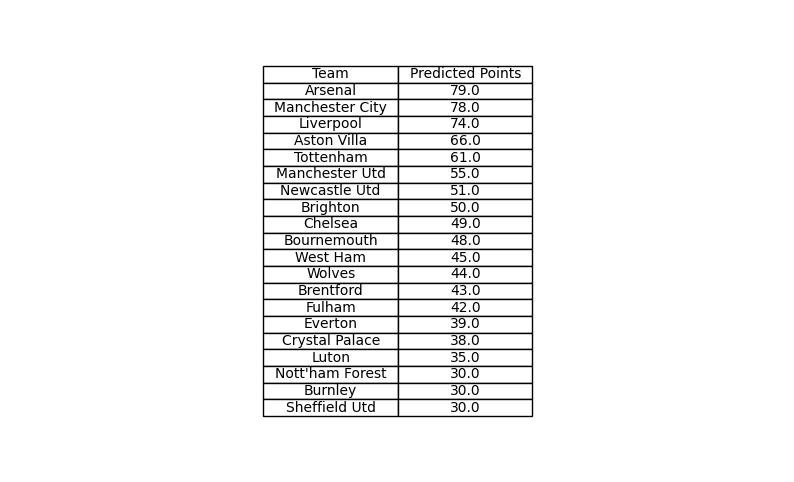

In [171]:
# Load the team ID mapping CSV
team_id_mapping_path = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\team_id_mapping.csv"
team_id_mapping = pd.read_csv(team_id_mapping_path, index_col="Team_ID")

# Merge the predicted positions DataFrame with the team ID mapping DataFrame
next_season_predictions_with_names = next_season_predictions_df.merge(team_id_mapping, left_on="Predicted Team ID", right_index=True)

# Reorder columns for better readability
next_season_predictions_with_names = next_season_predictions_with_names[["Team", "Predicted Points"]]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table from the DataFrame and display it on the axis
table = ax.table(cellText=next_season_predictions_with_names.values,
                 colLabels=next_season_predictions_with_names.columns,
                 loc='center', cellLoc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(next_season_predictions_with_names.columns))))

# Show the plot
plt.show()


In [135]:
# Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Perform prediction simulation 100 times
rf_predictions = []
for _ in range(100):
    # Make predictions for the next season using the Random Forest model
    next_season_rf_predictions = rf_model.predict(next_season_features_scaled)
    rf_predictions.append(next_season_rf_predictions)

# Calculate the average predictions
average_rf_predictions = np.mean(rf_predictions, axis=0)
average_rf_predictions = np.round(average_rf_predictions)

# Create DataFrame for predicted positions using Random Forest
next_season_rf_predictions_df = pd.DataFrame(average_rf_predictions, columns=["Predicted Points"])
next_season_rf_predictions_df["Predicted Team ID"] = next_season_features_df["Team_ID"]

# Sort the DataFrame by predicted points in descending order
next_season_rf_predictions_df = next_season_rf_predictions_df.sort_values(by="Predicted Points", ascending=False)

# Reset index to start from 1
next_season_rf_predictions_df.index = np.arange(1, len(next_season_rf_predictions_df) + 1)
next_season_rf_predictions_df.index.name = "Position"



In [136]:

# Load the team ID mapping CSV
team_id_mapping_path = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\team_id_mapping.csv"
team_id_mapping = pd.read_csv(team_id_mapping_path, index_col="Team_ID")

# Merge the predicted positions DataFrame with the team ID mapping DataFrame
next_season_rf_predictions_with_names = next_season_rf_predictions_df.merge(team_id_mapping, left_on="Predicted Team ID", right_index=True)

# Reorder columns for better readability
next_season_rf_predictions_with_names = next_season_rf_predictions_with_names[["Team", "Predicted Points"]]



In [137]:
# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Perform prediction simulation 100 times
xgb_predictions = []
for _ in range(100):
    # Make predictions for the next season using the XGBoost model
    next_season_xgb_predictions = xgb_model.predict(next_season_features_scaled)
    xgb_predictions.append(next_season_xgb_predictions)

# Calculate the average predictions
average_xgb_predictions = np.mean(xgb_predictions, axis=0)
average_xgb_predictions = np.round(average_xgb_predictions)

# Create DataFrame for predicted positions using XGBoost
next_season_xgb_predictions_df = pd.DataFrame(average_xgb_predictions, columns=["Predicted Points"])
next_season_xgb_predictions_df["Predicted Team ID"] = next_season_features_df["Team_ID"]

# Sort the DataFrame by predicted points in descending order
next_season_xgb_predictions_df = next_season_xgb_predictions_df.sort_values(by="Predicted Points", ascending=False)

# Reset index to start from 1
next_season_xgb_predictions_df.index = np.arange(1, len(next_season_xgb_predictions_df) + 1)
next_season_xgb_predictions_df.index.name = "Position"


In [139]:
# Load the team ID mapping CSV
team_id_mapping_path = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\team_id_mapping.csv"
team_id_mapping = pd.read_csv(team_id_mapping_path, index_col="Team_ID")

# Merge the predicted positions DataFrame with the team ID mapping DataFrame
next_season_xgb_predictions_with_names = next_season_xgb_predictions_df.merge(team_id_mapping, left_on="Predicted Team ID", right_index=True)

# Reorder columns for better readability
next_season_xgb_predictions_with_names = next_season_xgb_predictions_with_names[["Team", "Predicted Points"]]



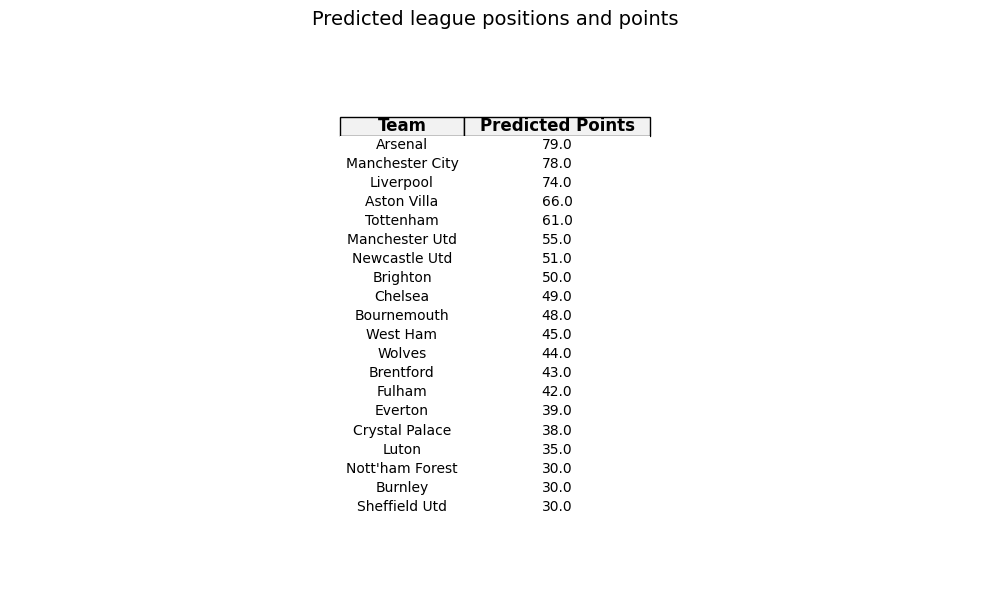

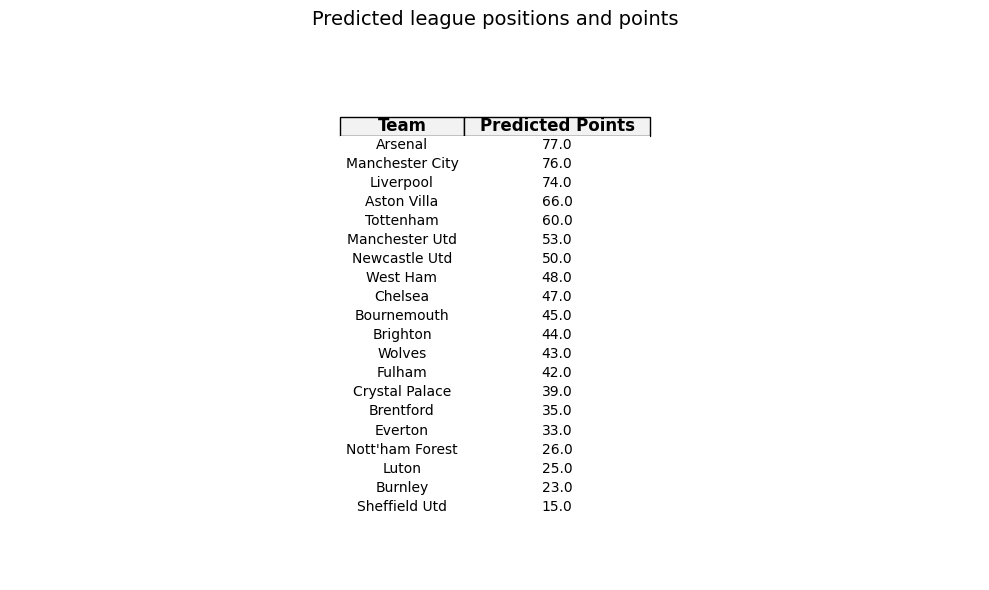

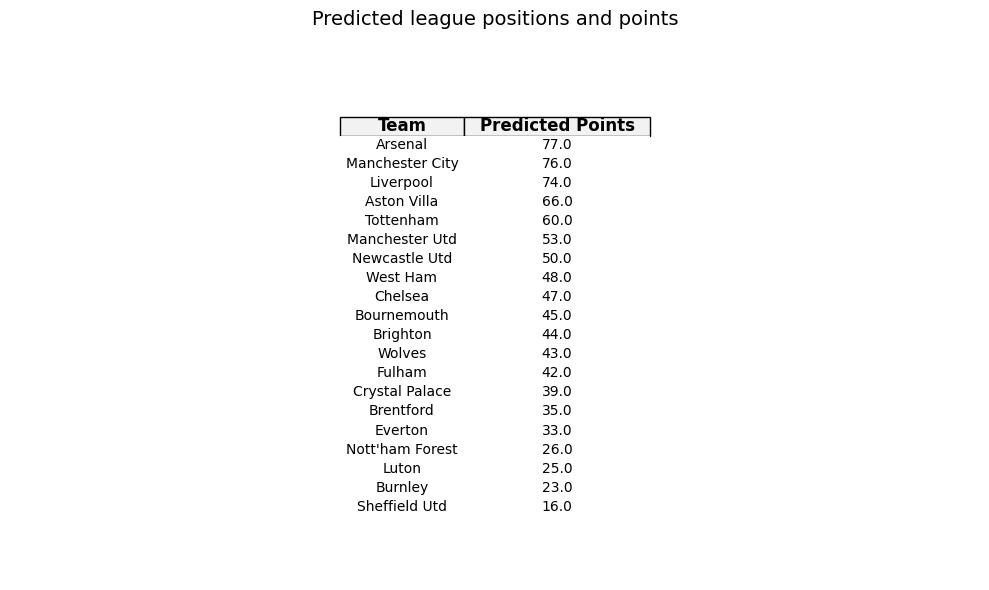

In [148]:

def display_table(df, title):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Hide axes
    ax.axis('tight')
    ax.axis('off')
    
    # Create a table from the DataFrame and display it on the axis
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     loc='center', cellLoc='center', colColours=['lightgray']*len(df.columns))
    
    # Set table properties
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    
    # Set cell alignment and padding
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_text_props(weight='bold', color='black')
            cell.set_fontsize(12)
            cell.set_facecolor('#f2f2f2')
        else:
            cell.set_fontsize(10)
            cell.set_linewidth(0)
            cell.PAD = 0.05
    
    # Set title
    ax.set_title(title, fontsize=14, pad=20)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Display table for regular predictions
display_table(next_season_predictions_with_names, "Predicted league positions and points")

# Display table for Random Forest predictions
display_table(next_season_rf_predictions_with_names, "Predicted league positions and points")

display_table(next_season_xgb_predictions_with_names, "Predicted league positions and points")


In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
actual_positions_df = pd.read_csv("C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\id\\path_to_next_season_features.csv")
actual_positions_df = actual_positions_df.sort_values(by="Points", ascending=False)
actual_positions_df.index = np.arange(1, len(actual_positions_df) + 1)

# Define a function to calculate MAE and RMSE
def calculate_error_metrics(predictions_df, actual_df):
    # Merge predicted and actual positions DataFrames based on team IDs
    comparison_df = pd.merge(predictions_df, actual_df, left_on="Predicted Team ID", right_on="Team_ID", suffixes=('_predicted', '_actual'))
    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(comparison_df['Predicted Points'], comparison_df['Points'])
    # Calculate root mean squared error (RMSE)
    rmse = mean_squared_error(comparison_df['Predicted Points'], comparison_df['Points'], squared=False)
    return mae, rmse

# Calculate error metrics for each algorithm
rf_mae, rf_rmse = calculate_error_metrics(next_season_rf_predictions_df, actual_positions_df)
xgb_mae, xgb_rmse = calculate_error_metrics(next_season_xgb_predictions_df, actual_positions_df)
nn_mae, nn_rmse = calculate_error_metrics(next_season_predictions_df, actual_positions_df)

print("Random Forest:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("\nXGBoost:")
print("MAE:", xgb_mae)
print("RMSE:", xgb_rmse)
print("\nNeural Network:")
print("MAE:", nn_mae)
print("RMSE:", nn_rmse)


Random Forest:
MAE: 0.05
RMSE: 0.22360679774997896

XGBoost:
MAE: 0.0
RMSE: 0.0

Neural Network:
MAE: 3.65
RMSE: 5.172040216394301


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


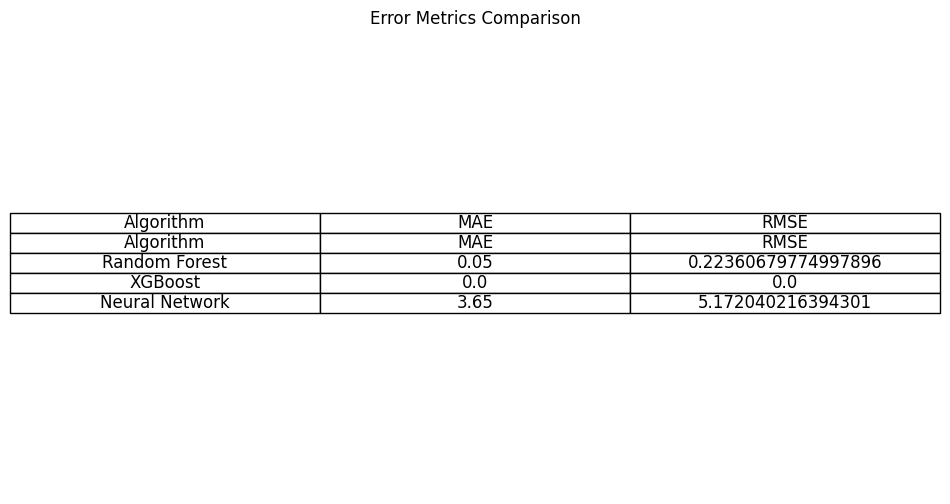

In [157]:
import matplotlib.pyplot as plt

# Define the data for the table
data = [
    ["Algorithm", "MAE", "RMSE"],
    ["Random Forest", rf_mae, rf_rmse],
    ["XGBoost", xgb_mae, xgb_rmse],
    ["Neural Network", nn_mae, nn_rmse]
]

# Create the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data,
                 loc='center',
                 cellLoc='center',
                 colLabels=data[0])

# Set the font size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Add a title
plt.title('Error Metrics Comparison')

# Show the table
plt.show()


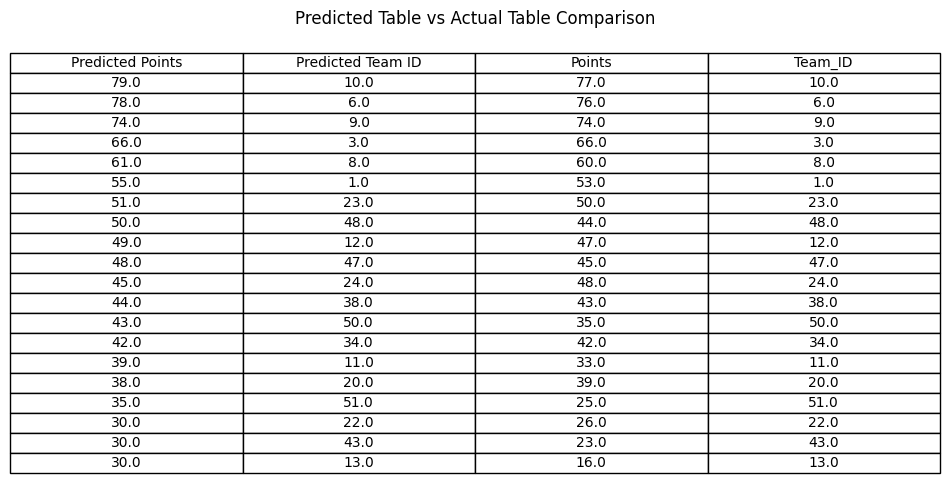

In [162]:
comparison_df = pd.merge(next_season_predictions_df, actual_positions_df, left_on="Predicted Team ID", right_on="Team_ID", suffixes=('_predicted', '_actual'))
comparison_df = comparison_df.drop(['Played', 'Goals For', 'Goals Against', 'Goal Difference'], axis=1)

# Create a table for comparison
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=comparison_df.values,
                 colLabels=comparison_df.columns,
                 loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Predicted Table vs Actual Table Comparison')
plt.show()



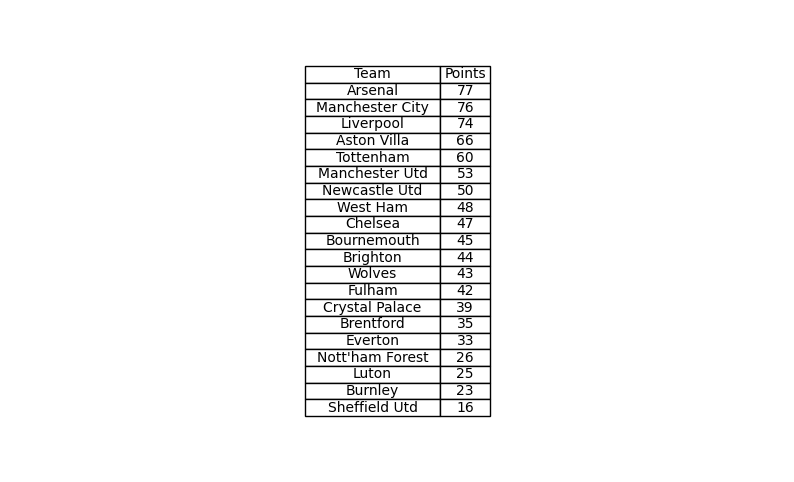

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the current season results
current_season_results_path = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\id\\path_to_next_season_features.csv"
current_season_results_df = pd.read_csv(current_season_results_path)

# Load the team ID mapping CSV
team_id_mapping_path = "C:\\Users\\sidbh\\Documents\\College\\DSE\\Datasets2\\new\\team_id_mapping.csv"
team_id_mapping = pd.read_csv(team_id_mapping_path, index_col="Team_ID")

# Merge the current season results DataFrame with the team ID mapping DataFrame
current_season_results_with_names = current_season_results_df.merge(team_id_mapping, left_on="Team_ID", right_index=True)

# Select 'Team' and 'Points' columns
team_points_df = current_season_results_with_names[['Team', 'Points']]

# Sort by points in descending order
team_points_df = team_points_df.sort_values(by='Points', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table from the DataFrame and display it on the axis
table = ax.table(cellText=team_points_df.values,
                 colLabels=team_points_df.columns,
                 loc='center', cellLoc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(team_points_df.columns))))

# Show the plot
plt.show()
